# Deep Learning with PyTorch

This is notebook for excersises with [PyTorch](https://pytorch.ord) framework.

In [156]:
# Import modules
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import halper
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

from torch import nn
from torch import optim
from torchvision import datasets, transforms

In [4]:
# Define activation functions
def sigmoid(x):
    """Sigmoid activation function"""
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    """TanH (Hyperbolic Tangent Function) activation function"""
    return torch.tanh(x)

relu = nn.ReLU()

## Single Neuron

In [5]:
# Generate random data
torch.manual_seed(7)

# Init features, weights, bias
features = torch.randn(1, 5)
weights = torch.randn_like(features)
bias = torch.randn(1, 1)

In [6]:
print("Features: ", features)
print("Weights: ", weights)
print("Bias: ", bias)

Features:  tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])
Weights:  tensor([[-0.8948, -0.3556,  1.2324,  0.1382, -1.6822]])
Bias:  tensor([[0.3177]])


In [7]:
# Calculate output
y = sigmoid(torch.sum(features * weights) + bias)
y

tensor([[0.1595]])

In [8]:
# Calculate output using matrix multiplication
y = sigmoid(torch.mm(features, weights.view(5,1)) + bias)
y

tensor([[0.1595]])

## Stack neurons to layers

In [21]:
# Define the structure
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units 
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# Bias terms for hidden and output layers
B1 = torch.randn(1, n_hidden)
B2 = torch.randn(1, n_output)

In [22]:
print("Features: ", features)
print("Input: ", features.shape[1])
print("W1: ", W1)
print("W2: ", W2)
print("B1: ", B1)
print("B2: ", B2)

Features:  tensor([[-0.1468,  0.7861,  0.9468, -1.1143,  1.6908]])
Input:  5
W1:  tensor([[ 0.3697, -0.5606],
        [ 0.2646,  0.7064],
        [-0.8986, -0.0961],
        [-1.2592,  0.0418],
        [ 0.1011,  0.1490]])
W2:  tensor([[-0.9955],
        [-1.9522]])
B1:  tensor([[0.4783, 1.0590]])
B2:  tensor([[0.9997]])


In [23]:
h = relu(torch.mm(features, W1) + B1)
y = sigmoid(torch.mm(h, W2) + B2)
y

tensor([[0.0201]])

## Network for text recognition

In [15]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [16]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


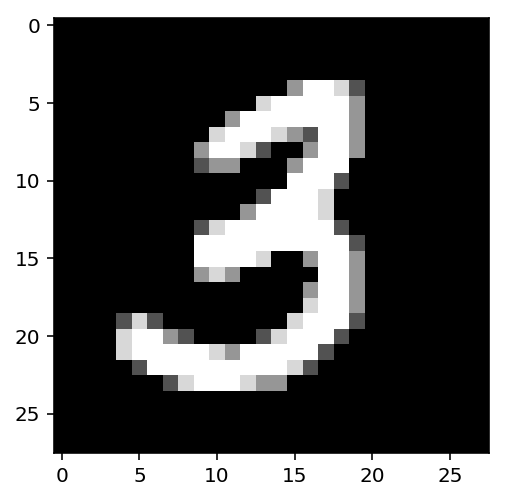

In [17]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [37]:
# Define the structure
n_inp = 784     # Number of input units
n_hid = 256    # Number of hidden units 
n_out = 10     # Number of output units

inputs = images.view(images.shape[0], -1)

# Weights for inputs to hidden layer
w1 = torch.randn(n_inp, n_hid)
w2 = torch.randn(n_hid, n_out)

# Bias terms for hidden and output layers
b1 = torch.randn(1, n_hid)
b2 = torch.randn(1, n_out)

In [53]:
hid = sigmoid(torch.mm(inputs, w1) + b1)
out = torch.mm(hid, w2) + b2
out

tensor([[  2.4434,   7.8544,  -4.3700, -10.8325, -22.0773,   8.8793,  -1.1883,
          14.2450,  14.4344,  12.9310],
        [  2.6226,  -4.3502,  -7.6140,  -7.6205, -18.5064,  22.0171,   5.9612,
          12.5862,  12.4638,   6.3309],
        [  7.6701,  -1.8777,  -9.6569,  -6.7564, -22.7910,  15.1550,   0.5149,
          19.5564,  11.1055,   8.9383],
        [  6.1556,  -3.3284, -12.3642, -12.5019, -21.2607,  10.0948,   6.7729,
          12.4125,  18.1837,  18.8285],
        [ 10.8766,   2.7531,  -2.2908,   0.8693, -24.0313,  12.2843,  -0.3357,
          19.6347,   8.1872,   9.5545],
        [  7.6735,  -0.9138,  -2.9558,  -7.9115, -18.5644,  13.6824,   5.5018,
          17.8240,  17.2933,   8.1571],
        [ 14.0969,  -1.9209,  -1.0299,  -3.6734, -21.6592,  18.3034,   4.9690,
          13.9612,  19.1078,   9.1441],
        [  6.4749,  -0.2957,  -7.3822,  -4.8512, -16.3132,  23.4433,   2.1114,
          20.0666,  14.1122,  14.3901],
        [  1.8112,  -3.5454,  -7.5679,   4.5000,

In [48]:
out.shape

torch.Size([64, 10])

In [91]:
def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1, 1)

In [95]:
# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)
# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [100]:
probabilities

tensor([[3.0169e-06, 6.7534e-04, 3.3153e-09, 5.1747e-12, 6.7661e-17, 1.8819e-03,
         7.9861e-08, 4.0265e-01, 4.8658e-01, 1.0821e-01],
        [3.7758e-09, 3.5380e-12, 1.3530e-13, 1.3442e-13, 2.5164e-18, 9.9985e-01,
         1.0639e-07, 8.0193e-05, 7.0955e-05, 1.5398e-07],
        [6.7988e-06, 4.8516e-10, 2.0296e-13, 3.6905e-12, 4.0120e-19, 1.2108e-02,
         5.3087e-09, 9.8765e-01, 2.1106e-04, 2.4167e-05],
        [2.0536e-06, 1.5619e-10, 1.8598e-14, 1.6206e-14, 2.5456e-18, 1.0551e-04,
         3.8073e-06, 1.0712e-03, 3.4378e-01, 6.5504e-01],
        [1.5705e-04, 4.6561e-08, 3.0026e-10, 7.0775e-09, 1.0857e-19, 6.4174e-04,
         2.1211e-09, 9.9915e-01, 1.0666e-05, 4.1862e-05],
        [2.4346e-05, 4.5397e-09, 5.8912e-10, 4.1492e-12, 9.8055e-17, 9.9099e-03,
         2.7752e-06, 6.2336e-01, 3.6667e-01, 3.9489e-05],
        [4.5654e-03, 5.0470e-10, 1.2302e-09, 8.7480e-11, 1.3514e-18, 3.0644e-01,
         4.9575e-07, 3.9859e-03, 6.8498e-01, 3.2248e-05],
        [4.1307e-08, 4.7381

## Building network for text recognition

In [105]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [106]:
# Create the network and look at it's text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [118]:
class Network1(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden1 = nn.Linear(784, 128)
        # Second hidden
        self.hidden2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        # 1 hidden layer with relu activation
        x = F.relu(self.hidden1(x))
        # 2 hidden layer with relu activation
        x = F.relu(self.hidden2(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [119]:
model = Network1()
model

Network1(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [120]:
print(model.hidden1.weight)
print(model.hidden1.bias)
print(model.hidden2.weight)
print(model.hidden2.bias)

Parameter containing:
tensor([[-0.0005, -0.0351, -0.0133,  ..., -0.0033,  0.0299,  0.0124],
        [ 0.0356, -0.0150, -0.0306,  ..., -0.0139, -0.0245,  0.0298],
        [ 0.0018, -0.0095, -0.0248,  ..., -0.0255, -0.0291, -0.0105],
        ...,
        [ 0.0123, -0.0051,  0.0343,  ..., -0.0214, -0.0213,  0.0200],
        [-0.0054,  0.0067, -0.0009,  ...,  0.0138, -0.0028, -0.0189],
        [-0.0072,  0.0278, -0.0215,  ...,  0.0309,  0.0095,  0.0079]],
       requires_grad=True)
Parameter containing:
tensor([-0.0203,  0.0106, -0.0261,  0.0285,  0.0132, -0.0233, -0.0356,  0.0184,
         0.0154, -0.0243,  0.0159, -0.0350, -0.0104, -0.0164,  0.0169, -0.0061,
        -0.0227,  0.0279,  0.0139,  0.0118, -0.0152,  0.0296, -0.0042, -0.0106,
        -0.0009,  0.0057,  0.0129, -0.0151, -0.0129,  0.0183, -0.0024, -0.0073,
        -0.0240, -0.0127,  0.0032,  0.0001, -0.0257, -0.0202,  0.0109,  0.0240,
         0.0222, -0.0125,  0.0029,  0.0140,  0.0059, -0.0069,  0.0191,  0.0007,
        -0.0173

In [121]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [126]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))
print(model)

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get the data
images, labels = next(iter(trainloader))

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass
logits = model(images)

# Calculate the loss
loss = criterion(logits, labels)

print(loss)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)
tensor(2.2971, grad_fn=<NllLossBackward>)


## Network Architecture 

In [1]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

NameError: name 'transforms' is not defined

In [143]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss and optimizer
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        
        # Gradient to zero
        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss / len(trainloader)}")

Training loss: 1.9165062342625436
Training loss: 0.8522378489343342
Training loss: 0.5235032586972597
Training loss: 0.4269198602609543
Training loss: 0.3825194837410313
Training loss: 0.3558722241505631
Training loss: 0.3375131562193319
Training loss: 0.3232306465903706
Training loss: 0.31178819408008795
Training loss: 0.30212394501577056
Training loss: 0.29327114293776724
Training loss: 0.2861143695647274
Training loss: 0.2786511334815005
Training loss: 0.2719529879642829
Training loss: 0.26518515482354266
Training loss: 0.2590887011733772
Training loss: 0.2532401323509115
Training loss: 0.24749537739259347
Training loss: 0.241735609963155
Training loss: 0.23610079841318923


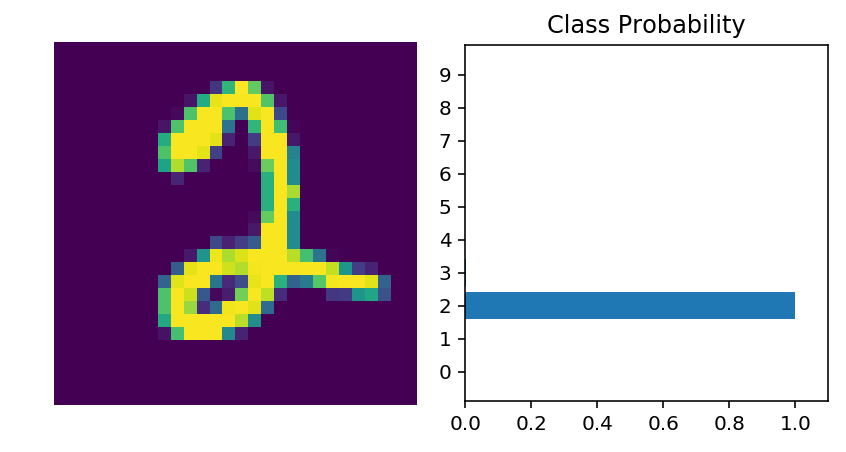

In [165]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
logps = model.forward(img)

ps = torch.exp(logps)
halper.view_classify(img.view(1, 28, 28), ps)